## Dataset: Ferguson et al. 2015

Data set of CA1 pyramidal cell recordings using an intact whole hippocampus preparation, including recordings of rebound firing.

Source of data: https://www.zenodo.org/record/17794#.W5j7lBQnYYM

In [1]:
#https://pypi.org/project/pyabf/
import pyabf

abf = pyabf.ABF("PYR1.abf") # read one data set

print("Loaded file: %s"%abf)

abf.setSweep(1) # sweeps start at 0

print('Times info (%i points): %s'%(len(abf.sweepX),abf.sweepX)) # sweep times (seconds)
print('Current info (%i points): %s'%(len(abf.sweepY),abf.sweepY)) # sweep data (ADC)



Loaded file: ABF file (PYR1.abf) with 2 channels, 30 sweeps, and a total length of 0.50 min.
Times info (20000 points): [0.0000e+00 5.0000e-05 1.0000e-04 ... 9.9985e-01 9.9990e-01 9.9995e-01]
Current info (20000 points): [-23.498535  -25.024414   -4.5776367 ... -10.070801  -15.258789
 -10.070801 ]


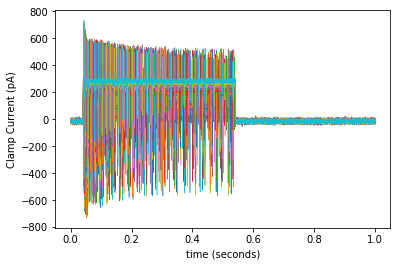

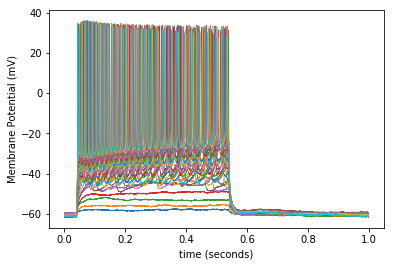

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

max = abf.sweepCount
#max = 12

for i in range(max):
    
    abf.setSweep(i, channel=0) # sweeps start at 0
    plt.plot(abf.sweepX, abf.sweepY, lw=.5, label='Sweep %i'%i)
    plt.ylabel(abf.sweepLabelY)
    plt.xlabel(abf.sweepLabelX)
    #plt.legend()
    
plt.show()
    
for i in range(max):
    abf.setSweep(i, channel=1) # sweeps start at 0
    plt.plot(abf.sweepX, abf.sweepY, lw=.5, label='Sweep %i'%i)
    plt.ylabel(abf.sweepLabelY)
    plt.xlabel(abf.sweepLabelX)
    #plt.legend()
    
plt.show()


In [3]:
abf.setSweep(0)
print(abf)
print(abf.abfFileComment)
print(abf.abfVersion)
print(abf.adcNames)
print(abf.adcUnits)
print(abf.channelCount)
print(abf.channelList)
print(abf.data)
print(abf.dataPointsPerMs)
print(abf.protocol)
print(abf.protocolPath)
print(abf.stimulusByChannel)
print(abf.stimulusByChannel[1])
print(abf.sweepLabelX)
print(abf.sweepLabelY)
print(22)
print(abf.sweepLabelC)
print(abf.sweepChannel)
print(abf.sweepY)
abf.sweepChannel = 1
print(abf.sweepChannel)
print(abf.sweepY)
print(abf.sweepLabelY)

print(abf.sweepList)
print(abf._headerV1) # display header information in the console
print(abf.sweepX)
print(abf.sweepY)
print(abf.sweepC)
print(abf.sweepD())


ABF file (PYR1.abf) with 2 channels, 30 sweeps, and a total length of 0.50 min.

{'major': 1, 'minor': 8, 'bugfix': 3, 'build': 0}
['Imemb', 'Vm']
['pA', 'mV']
2
[0, 1]
[[-12.817383 -15.258789 -12.207031 ... -13.122559 -21.057129 -14.953613]
 [-60.21118  -60.180664 -60.21118  ... -61.21826  -61.24878  -61.12671 ]]
20
C:\Axon\Params\Carey protocols\cc10pA1s
C:\Axon\Params\Carey protocols\cc10pA1s.pro
[ChannelEpochs(ABF, 0), ChannelEpochs(ABF, 1)]
Channel 1 epochs (1): A
time (seconds)
Clamp Current (pA)
22
Membrane Potential (mV)
0
[-12.817383 -15.258789 -12.207031 ... -14.343262  -7.019043  -9.155273]
1
[-12.817383 -15.258789 -12.207031 ... -14.343262  -7.019043  -9.155273]
Clamp Current (pA)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0.0000e+00 5.0000e-05 1.0000e-04 ... 9.9985e-01 9.9990e-01 9.9995e-01]
[-12.817383 -15.258789 -12.207031 ... -14.343262  -7.019043  -9.155273]
[nan nan nan ... nan nan nan]
False


In [6]:
from datetime import datetime

from dateutil.tz import tzlocal
import pynwb
import math

start_time = datetime(2019, 1, 1, 11, tzinfo=tzlocal())
create_date = datetime.now(tz=tzlocal())

nwbfile = pynwb.NWBFile('Ferguson et al.', 
                  'TSD', 
                  start_time,
                  file_create_date=create_date,
                  notes='Ephys created with pynwb v%s'%pynwb.__version__,
                  experimenter='Katie A. Ferguson',
                  experiment_description='Data set of CA1 pyramidal cell recordings using an intact whole hippocampus preparation, including recordings of rebound firing',
                  institution='University of Toronto')
                  
for i in range(max):
    abf.setSweep(i, channel=1) # sweeps start at 0
    timestamps = abf.sweepX
    data = abf.sweepY

    ts = pynwb.TimeSeries('Sweep_%i'%i, 
                          data, 
                          'mV', 
                          timestamps=timestamps, 
                          description='Sweep %i, voltage'%i,
                          comments='Extracted from ABF file')

    nwbfile.add_acquisition(ts)
    
    abf.setSweep(i, channel=0) # sweeps start at 0
    timestamps = abf.sweepX
    data = abf.sweepY

    ts_stim = pynwb.TimeSeries('Sweep_%i'%i, 
                               data, 
                               'pA', 
                               timestamps=timestamps, 
                               description='Sweep %i, applied current'%i,
                               comments='Extracted from ABF file')

    nwbfile.add_stimulus(ts_stim)

nwb_file_name = 'FergusonEtAl2015.nwb'
io = pynwb.NWBHDF5IO(nwb_file_name, mode='w')
io.write(nwbfile)
io.close()
print("Written NWB file to %s"%nwb_file_name)

Written NWB file to FergusonEtAl2015.nwb
